# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, **BikeIndia** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# READ DATA
df=pd.read_csv("day.csv")

In [4]:
# Having a look at data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#To check columns present in dataset
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [6]:
#Get basic idea of data using describe()
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.shape

(730, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Finding : 
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type. 

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

# DATA QUALITY CHECK

## Check for NULL/MISSING values

In [9]:
#checking for null values in dataset
count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [11]:
# row-wise null count percentage
round((df.isnull().sum(axis=1)/len(df))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

## Finding
There are no missing / Null values either in columns or rows

## Duplicate Check

In [12]:
df_dup = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)

In [13]:
df_dup.shape

(730, 16)

In [14]:
df.shape

(730, 16)

### Insights 

The shape after running the drop duplicate command is same as the original dataframe. 

Hence we can conclude that there were zero duplicate values in the dataset. 

## Data Cleaning

Checking value_counts() for entire dataframe. 

This will help to identify any Unknow/Junk values present in the dataset.

In [15]:
#Create a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

df_dummy=df.iloc[:,1:16]

In [16]:
df_dummy.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [17]:
for col in df_dummy:
    print(df_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64 



1    504
0    226
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

### Insights 
There seems to be no Junk/Unknown values in the entire dataset.

# Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. **instant** : Its only an index value

2. **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column. 

3.  **casual & registered** : Both these columns contains the count of bike booked by different categories of customers.
Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
More over, we have created a new variable to have the ratio of these customer types.

4.  We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [18]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

df_dummy.drop(['dteday'],axis=1,inplace=True)
df_dummy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
df_dummy.drop(['casual','registered'],axis=1,inplace=True)
df_dummy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [20]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [21]:
df_dummy['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df_dummy.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [22]:
df_dummy['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True) 
df_dummy.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [23]:
df_dummy['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df_dummy.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [24]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [25]:
#changing datatypes of numerical columns to appropriate types

df_dummy[['temp','atemp','hum','windspeed','cnt']]=df_dummy[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [26]:
df_dummy.head()
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### Performing EDA

#### PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

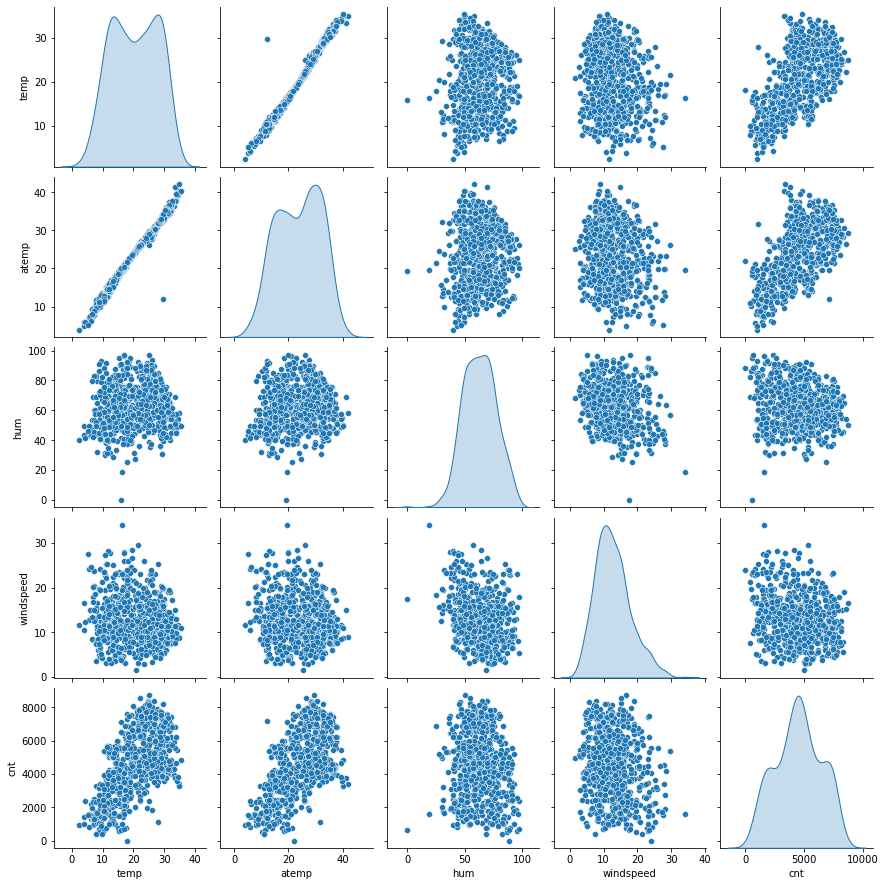

In [27]:
sns.pairplot(df_dummy, vars=['temp','atemp','hum','windspeed',"cnt"], diag_kind='kde')
plt.show()

### Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt' 

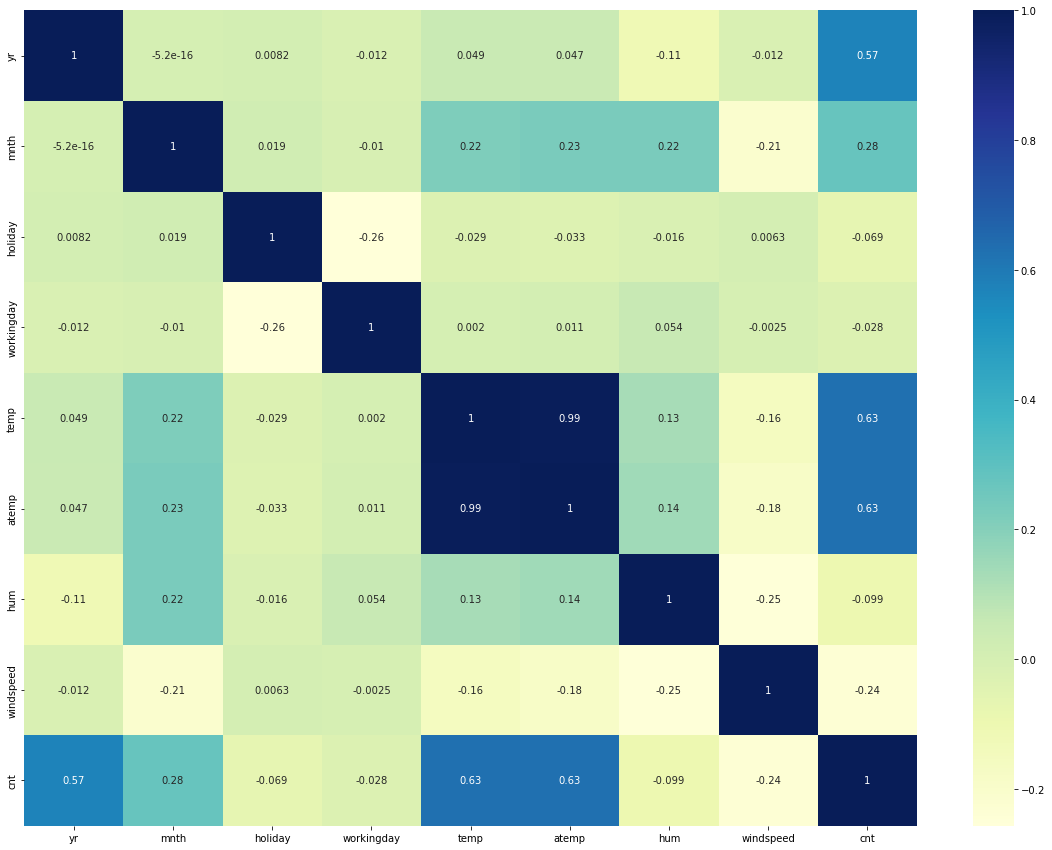

In [28]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (20, 15))
sns.heatmap(df_dummy.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Insights:
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## Visualising Catagorical Variables

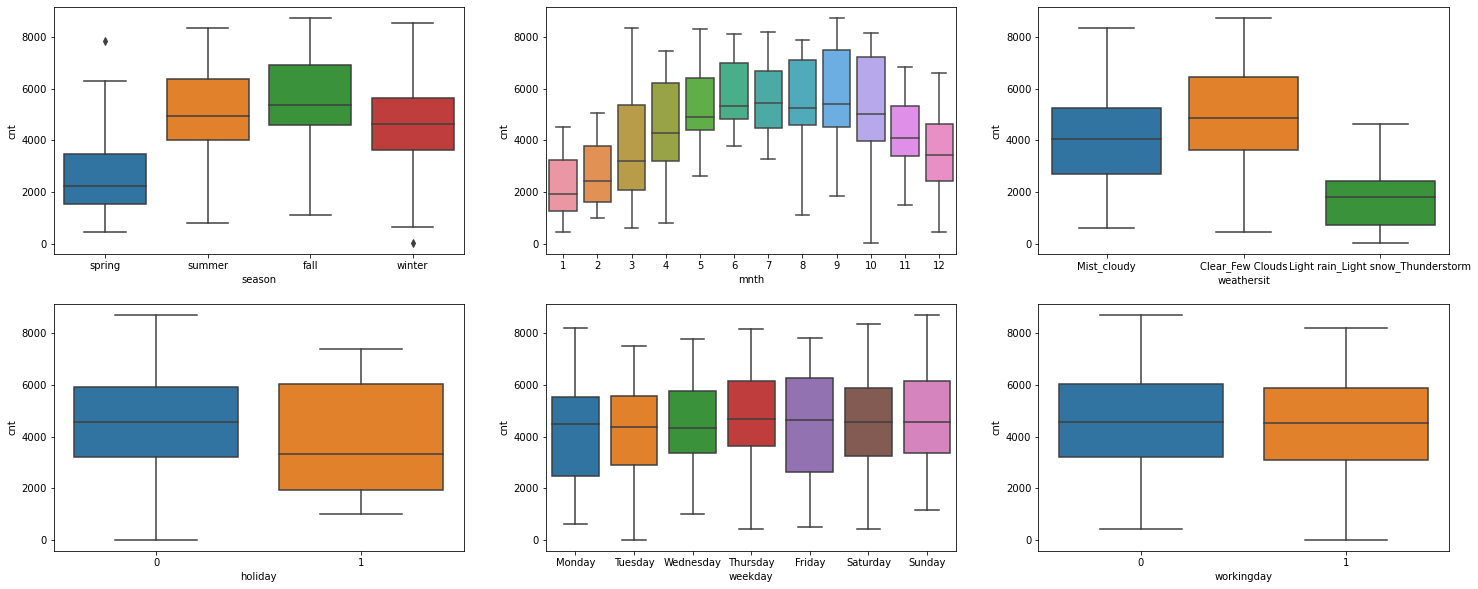

In [29]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_dummy)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_dummy)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_dummy)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_dummy)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_dummy)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_dummy)
plt.show()

### Insights
There were 6 categorical variables in the dataset. 

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . 

The inference that We could derive were: 
- **season**: Almost 32% of the bike booking were happening in fall with a median of over 5000 booking (for the period of 2 years). This was followed by summer & winter with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- **mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- **weathersit**: Almost 67% of the bike booking were happening during ‘Clear_Few Clouds with a median of close to 5000 booking (for the period of 2 years). This was followed by Mist_cloudy with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- **holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Creating dummy variables

In [30]:
#Convert variables to object type
df_dummy['mnth']=df_dummy['mnth'].astype(object)
df_dummy['season']=df_dummy['season'].astype(object)
df_dummy['weathersit']=df_dummy['weathersit'].astype(object)
df_dummy['weekday']=df_dummy['weekday'].astype(object)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [31]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(df_dummy['season'],drop_first=True)
Weather_condition=pd.get_dummies(df_dummy['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df_dummy['weekday'],drop_first=True)
Month=pd.get_dummies(df_dummy['mnth'],drop_first=True)

In [32]:
df_dummy=pd.concat([df_dummy,Season_condition],axis=1)
df_dummy=pd.concat([df_dummy,Weather_condition],axis=1)
df_dummy=pd.concat([df_dummy,Day_of_week],axis=1)
df_dummy=pd.concat([df_dummy,Month],axis=1)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   temp                                730 non-null    float64
 8   atemp                               730 non-null    float64
 9   hum                                 730 non-null    float64
 10  windspeed                           730 non-null    float64
 11  cnt                                 730 non-n

In [33]:
#Deleting the orginal columns season.weathersit,weekday,mnth
df_dummy.drop(['season'],axis=1,inplace=True)
df_dummy.drop(['weathersit'],axis=1,inplace=True)

df_dummy.drop(['weekday'],axis=1,inplace=True)

df_dummy.drop(['mnth'],axis=1,inplace=True)


df_dummy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

In [34]:
# Check the shape before spliting
df_dummy.shape

(730, 30)

In [35]:
# Check the info before spliting
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   temp                                730 non-null    float64
 4   atemp                               730 non-null    float64
 5   hum                                 730 non-null    float64
 6   windspeed                           730 non-null    float64
 7   cnt                                 730 non-null    int64  
 8   spring                              730 non-null    uint8  
 9   summer                              730 non-null    uint8  
 10  winter                              730 non-null    uint8  
 11  Light rain_Light snow_Thunderstorm  730 non-n

In [36]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df_dummy, train_size = 0.70, test_size = 0.30, random_state = 333)

In [37]:
df_train.shape

(510, 30)

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  510 non-null    int64  
 1   holiday                             510 non-null    int64  
 2   workingday                          510 non-null    int64  
 3   temp                                510 non-null    float64
 4   atemp                               510 non-null    float64
 5   hum                                 510 non-null    float64
 6   windspeed                           510 non-null    float64
 7   cnt                                 510 non-null    int64  
 8   spring                              510 non-null    uint8  
 9   summer                              510 non-null    uint8  
 10  winter                              510 non-null    uint8  
 11  Light rain_Light snow_Thunderstorm  510 non

In [39]:
df_test.shape

(219, 30)

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  219 non-null    int64  
 1   holiday                             219 non-null    int64  
 2   workingday                          219 non-null    int64  
 3   temp                                219 non-null    float64
 4   atemp                               219 non-null    float64
 5   hum                                 219 non-null    float64
 6   windspeed                           219 non-null    float64
 7   cnt                                 219 non-null    int64  
 8   spring                              219 non-null    uint8  
 9   summer                              219 non-null    uint8  
 10  winter                              219 non-null    uint8  
 11  Light rain_Light snow_Thunderstorm  219 non-

## RESCALING THE FEATURES

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,1,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,0,0,0,1,0,0,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                     'temp',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
          

In [45]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [46]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,1,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,0,1,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.078431,0.084314,0.092157,0.072549,0.078431,0.098039,0.082353,0.084314,0.086275,0.076471
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.269113,0.278131,0.289531,0.259649,0.269113,0.297660,0.275172,0.278131,0.281045,0.266010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [48]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**  for its compatibility with RFE (which is a utility from sklearn)

In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 9),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', False, 2),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 7),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 (2, False, 8),
 (3, True, 1),
 (4, False, 3),
 (5, True, 1),
 (6, False, 4),
 (7, False, 15),
 (8, False, 5),
 (9, True, 1),
 (10, True, 1),
 (11, False, 11),
 (12, False, 12)]

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 9),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', False, 2),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 7),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 (2, False, 8),
 (3, True, 1),
 (4, False, 3),
 (5, True, 1),
 (6, False, 4),
 (7, False, 15),
 (8, False, 5),
 (9, True, 1),
 (10, True, 1),
 (11, False, 11),
 (12, False, 12)]

In [53]:
X_train.columns[~rfe.support_]

Index([  'holiday',    'summer',    'winter',    'Monday',  'Thursday',
         'Tuesday', 'Wednesday',           2,           4,           6,
                 7,           8,          11,          12],
      dtype='object')

In [54]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                               'workingday',
                                     'temp',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                   'Sunday',
                                          3,
                                          5,
                                          9,
                                         10],
      dtype='object')

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'

### Model 1

### VIF Check

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,355.44
2,temp,343.06
4,hum,26.34
1,workingday,18.73
5,windspeed,5.83
9,Saturday,4.54
10,Sunday,4.43
6,spring,2.28
8,Mist_cloudy,2.25
0,yr,1.99


In [57]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [58]:
# Check the parameters obtained

lr1.params

const                                 0.341344
yr                                    0.232153
workingday                            0.044601
temp                                  0.233515
atemp                                 0.168098
hum                                  -0.165487
windspeed                            -0.177115
spring                               -0.142608
Light rain_Light snow_Thunderstorm   -0.273672
Mist_cloudy                          -0.049513
Saturday                              0.068651
Sunday                                0.065364
3                                     0.050556
5                                     0.034975
9                                     0.094683
10                                    0.084181
dtype: float64

In [59]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.6
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          1.08e-182
Time:                        22:01:42   Log-Likelihood:                 499.88
No. Observations:                 510   AIC:                            -967.8
Df Residuals:                     494   BIC:                            -900.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Model 2

- Removing the variable 'atemp' based on its High p-value & High VIF

In [60]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

### VIF Check

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.05
1,workingday,18.54
2,temp,10.63
4,windspeed,5.67
8,Saturday,4.53
9,Sunday,4.39
5,spring,2.27
7,Mist_cloudy,2.24
0,yr,1.99
13,10,1.24


In [62]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [63]:
# Check the parameters obtained

lr2.params

const                                 0.344803
yr                                    0.232270
workingday                            0.045596
temp                                  0.387496
hum                                  -0.163250
windspeed                            -0.183238
spring                               -0.143546
Light rain_Light snow_Thunderstorm   -0.274911
Mist_cloudy                          -0.049904
Saturday                              0.068169
Sunday                                0.066172
3                                     0.051479
5                                     0.035871
9                                     0.094042
10                                    0.085400
dtype: float64

In [64]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.3
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          1.65e-183
Time:                        22:01:42   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -968.2
Df Residuals:                     495   BIC:                            -904.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Model 3

 - Based on p-value and VIF value remove 'workingday' 

In [65]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

### VIF Check

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.60
1,temp,9.84
3,windspeed,4.78
4,spring,2.14
6,Mist_cloudy,2.13
0,yr,1.98
12,10,1.24
10,5,1.23
11,9,1.22
7,Saturday,1.21


In [67]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [68]:
lr3.params

const                                 0.389300
yr                                    0.231344
temp                                  0.387111
hum                                  -0.162864
windspeed                            -0.182791
spring                               -0.144045
Light rain_Light snow_Thunderstorm   -0.274191
Mist_cloudy                          -0.049731
Saturday                              0.023897
Sunday                                0.022003
3                                     0.052544
5                                     0.035814
9                                     0.094948
10                                    0.084029
dtype: float64

In [69]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.3
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          4.17e-184
Time:                        22:01:42   Log-Likelihood:                 497.80
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     496   BIC:                            -908.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Model 4

- Remove Sunday based on High p-value

In [70]:
X_train_new = X_train_new.drop(["Sunday"], axis = 1)

### VIF Check

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.57
1,temp,9.84
3,windspeed,4.75
4,spring,2.14
6,Mist_cloudy,2.13
0,yr,1.98
11,10,1.24
9,5,1.23
10,9,1.22
8,3,1.21


In [72]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [73]:
# Check the parameters obtained

lr4.params

const                                 0.397612
yr                                    0.231545
temp                                  0.385240
hum                                  -0.168904
windspeed                            -0.183615
spring                               -0.144838
Light rain_Light snow_Thunderstorm   -0.273802
Mist_cloudy                          -0.048369
Saturday                              0.020113
3                                     0.052327
5                                     0.036162
9                                     0.096105
10                                    0.085207
dtype: float64

In [74]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.0
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          1.53e-184
Time:                        22:01:42   Log-Likelihood:                 496.06
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     497   BIC:                            -911.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Model 4

- Eliminate 'Saturday' based on p-value. 

In [75]:
X_train_new = X_train_new.drop(["Saturday"], axis = 1)

### VIF Check

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.56
1,temp,9.82
3,windspeed,4.74
4,spring,2.14
6,Mist_cloudy,2.12
0,yr,1.97
10,10,1.24
8,5,1.23
9,9,1.22
7,3,1.20


In [77]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [78]:
# Check the parameters obtained

lr5.params

const                                 0.401981
yr                                    0.231884
temp                                  0.385494
hum                                  -0.172216
windspeed                            -0.184184
spring                               -0.145638
Light rain_Light snow_Thunderstorm   -0.270824
Mist_cloudy                          -0.047057
3                                     0.054254
5                                     0.036908
9                                     0.096166
10                                    0.085127
dtype: float64

In [79]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.7
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          4.21e-185
Time:                        22:01:42   Log-Likelihood:                 494.57
No. Observations:                 510   AIC:                            -965.1
Df Residuals:                     498   BIC:                            -914.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Model 6

- Removing the variable 'hum' based on its High 'VIF'.

In [80]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.50
1,temp,4.33
0,yr,1.96
3,spring,1.74
5,Mist_cloudy,1.50
6,3,1.20
7,5,1.20
8,9,1.20
9,10,1.15
4,Light rain_Light snow_Thunderstorm,1.08


In [82]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [83]:
# Check the parameters obtained

lr6.params

const                                 0.295803
yr                                    0.235562
temp                                  0.371533
windspeed                            -0.147393
spring                               -0.144266
Light rain_Light snow_Thunderstorm   -0.321498
Mist_cloudy                          -0.075353
3                                     0.061085
5                                     0.026696
9                                     0.087481
10                                    0.077725
dtype: float64

In [84]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.0
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          5.34e-182
Time:                        22:01:42   Log-Likelihood:                 484.39
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     499   BIC:                            -900.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Model 7

In [85]:
X_train_new = X_train_new.drop([5], axis = 1)

In [86]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.50
1,temp,4.11
0,yr,1.96
3,spring,1.72
5,Mist_cloudy,1.49
6,3,1.20
7,9,1.17
8,10,1.13
4,Light rain_Light snow_Thunderstorm,1.08


In [87]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [88]:
# Check the parameters obtained

lr7.params

const                                 0.298244
yr                                    0.235261
temp                                  0.375111
windspeed                            -0.149027
spring                               -0.146983
Light rain_Light snow_Thunderstorm   -0.322577
Mist_cloudy                          -0.074305
3                                     0.059496
9                                     0.082838
10                                    0.073621
dtype: float64

In [89]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.8
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          1.50e-182
Time:                        22:01:42   Log-Likelihood:                 482.81
No. Observations:                 510   AIC:                            -945.6
Df Residuals:                     500   BIC:                            -903.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr7 model coefficient values

- const                                       0.2982      
- yr                                          0.2353        
- temp                                        0.3751     
- windspeed                                  -0.1490      
- spring                                     -0.1470      
- Light rain_Light snow_Thunderstorm         -0.3226      
- Mist_cloudy                                -0.0743      
- mnth_3                                      0.0595     
- mnth_9                                      0.0828      
- mnth_10                                     0.0736      


### Insights
- From the lr7 model summary, it is evident that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**
    

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 260.8
- Prob (F-statistic): 1.50e-182

The F-Statistics value of 260(which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

### The equation of best fitted surface based on model lr7:

## ASSUMPTIONS 

### Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [90]:
y_train_pred = lr7.predict(X_train_lm7)

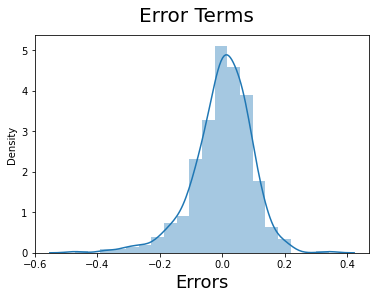

In [91]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

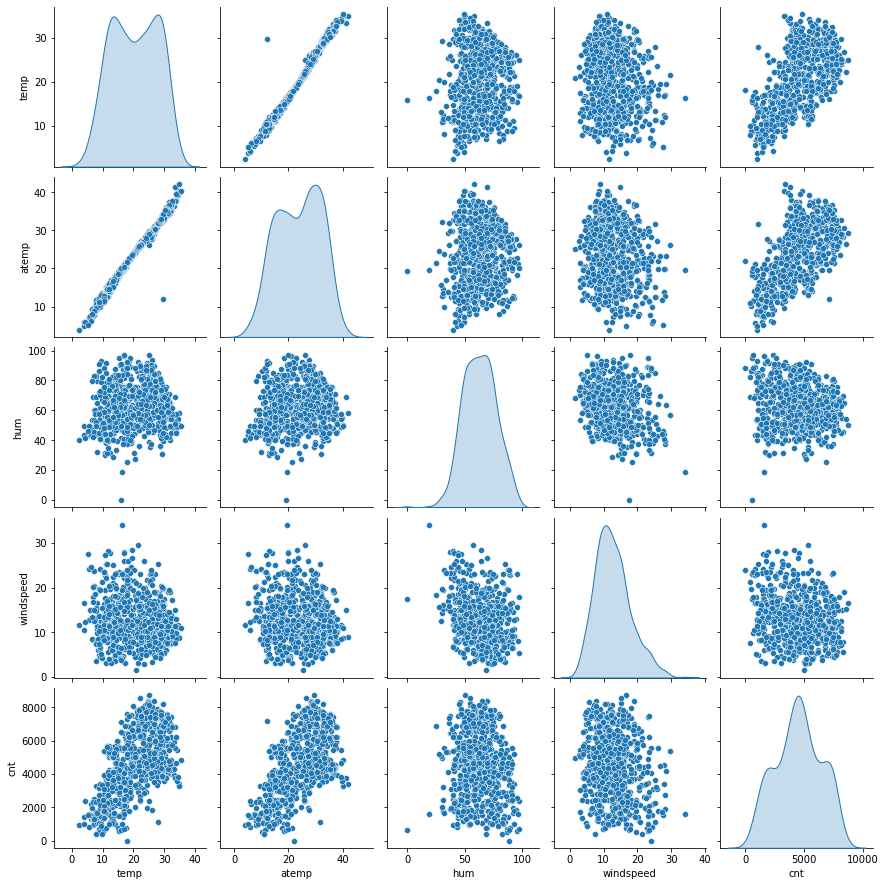

In [92]:
sns.pairplot(df_dummy, vars = [ 'temp', 'atemp', 'hum', 'windspeed','cnt'], diag_kind='kde')
plt.show()

## Insight
- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## There is No Multicollinearity between the predictor variables

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.50
1,temp,4.11
0,yr,1.96
3,spring,1.72
5,Mist_cloudy,1.49
6,3,1.20
7,9,1.17
8,10,1.13
4,Light rain_Light snow_Thunderstorm,1.08


## Insight

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [94]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [95]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,1,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,1,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,...,0.100457,0.077626,0.068493,0.105023,0.100457,0.054795,0.082192,0.086758,0.073059,0.105023
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,...,0.301297,0.268194,0.253169,0.307285,0.301297,0.228100,0.275286,0.282125,0.260830,0.307285
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [97]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  219 non-null    int64  
 1   holiday                             219 non-null    int64  
 2   workingday                          219 non-null    int64  
 3   temp                                219 non-null    float64
 4   atemp                               219 non-null    float64
 5   hum                                 219 non-null    float64
 6   windspeed                           219 non-null    float64
 7   spring                              219 non-null    uint8  
 8   summer                              219 non-null    uint8  
 9   winter                              219 non-null    uint8  
 10  Light rain_Light snow_Thunderstorm  219 non-null    uint8  
 11  Mist_cloudy                         219 non-

In [98]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   const                               219 non-null    float64
 1   yr                                  219 non-null    int64  
 2   temp                                219 non-null    float64
 3   windspeed                           219 non-null    float64
 4   spring                              219 non-null    uint8  
 5   Light rain_Light snow_Thunderstorm  219 non-null    uint8  
 6   Mist_cloudy                         219 non-null    uint8  
 7   3                                   219 non-null    uint8  
 8   9                                   219 non-null    uint8  
 9   10                                  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.8 KB


In [99]:
# Making predictions using the final model (lr6)

y_pred = lr7.predict(X_test_lm7)

# MODEL EVALUATION

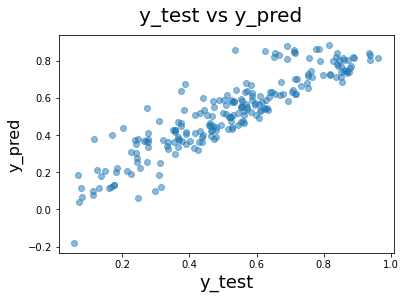

In [100]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8132680185517541

## Adjusted R^2 Value for TEST

In [102]:
# We already have the value of R^2 (calculated in above step)

r2=r2_score(y_test, y_pred)

In [103]:
# Get the shape of X_test
X_test.shape

(219, 9)

In [104]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8052269284415425

# Final Result Comparison

- Train R^2 :0.824
- Train Adjusted R^2 :0.821 
- Test R^2 :0.8132
- Test Adjusted R^2 :0.8052
- This seems to be a really good model that can very well 'Generalize' various datasets.

# FINAL REPORT

As per my final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.3751’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.3751 units. 
- **Light rain_Light snow_Thunderstorm** - A coefficient value of ‘-0.3226’ indicated that, w.r.t Clear_Few Clouds, a unit increase in Light rain_Light snow_Thunderstorm variable decreases the bike hire numbers by 0.3226 units.
- **Year (yr)** - A coefficient value of ‘0.2353’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2353 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **spring:** - A coefficient value of ‘-0.1470’ indicated that w.r.t spring, a unit increase in season_4 variable decreases the bike hire numbers by 0.1470 units. 
- **windspeed:** - A coefficient value of ‘-0.1490’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1490 units. 